# SLU 05 - Covariance and Correlation: Exercise notebook

In [1]:
import pandas as pd 
import numpy as np 
import math 

from matplotlib import pyplot as plt 
from utils import get_house_prices_and_rooms, plot_house_prices_and_rooms

# this is for grading without showing the answers 
import hashlib
def hash_answer(answer): 
    answer=str(answer)
    return hashlib.sha256((answer).encode()).hexdigest()

In this notebook you will practice the following: 

    - Covariance 
    - Pearson correlation
    - Spearman correlation
    - Correlation matrix
    - Spurious correlations

# Exercise 1: implement covariance 


Here you will implment covariance, by completing the following function.

Don't worry too much about generalizing, this will be an extremely naïve implementation, just to get your hands dirty!

Here is a quick reminder of the formula: 
$$ cov = \frac{\sum{(X - X_{avg})(Y - Y_{avg})}}{n-1} $$

Where `n` is the number of points in either X or Y.

#### Implement the following: 

In [18]:
def covariance_by_hand(s1, s2):
    """ 
    Naive implementation of covariance by hand 
    
    Args:
        s1 (pd.Series): a pandas series 
        s2 (pd.Series): a pandas series (the same index and length as s1)

    Returns:
        covariance (float): the covariance between s1 and s2 
    """    
    
    # Note: it is generally best to do this is multiple small steps 
    # e.g. start by making s1_avg, then later s1_minus_s1_avg, etc...
    
    s1_avg = s1.mean()
    s2_avg = s2.mean()
    numerator = (s1 - s1_avg)*(s2 - s2_avg)
    denominator = len(s1)-1
    
    covariance = numerator.sum() / denominator

    return covariance

In [19]:
a = pd.Series([1, 5, 7, 10, 25])
b = pd.Series([15, 30, 28, 45, 50])
print('Covariance by hand between a and b: %0.02f' % covariance_by_hand(a, b))

Covariance by hand between a and b: 112.05


Expected output:   

    Covariance by hand between a and b: 112.05

In [21]:
a = pd.Series([1, 5, 7, 10, 25])
b = pd.Series([15, 30, 28, 45, 50]) 
c = pd.Series([22, 55, 23, 15, 92])
assert np.isclose(covariance_by_hand(a, b), 112.05)
assert np.isclose(covariance_by_hand(a, c), 230.2)

# Exercise 2: implement pearson correlation

Correlation is simply normalized covariance! 

$$ correlation = \frac{covariance(X, Y)}{\sqrt{Var(X) * Var(Y)}} $$

#### Complete here: 

In [23]:
def pearson_correlation_by_hand(s1, s2): 
    """ 
    Naive implementation of pearson correlation
    
    Args:
        s1 (pd.Series): a pandas series 
        s2 (pd.Series): a pandas series (the same index and length as s1)

    Returns:
        pearson correlation (float): the correlation between s1 and s2 

    """
    
    # clue: remember, you've already implemented a function the top half in exercise one 
    # clue: for the square root you can use np.sqrt(...)
    
    covariance = covariance_by_hand(s1, s2)
    var_1 = s1.var()
    var_2 = s2.var()
    
    denominator = np.sqrt(var_1 * var_2)
    
    pearson_correlation = covariance / denominator   
    
    return pearson_correlation

In [24]:
a = pd.Series([1, 5, 7, 10, 25])
b = pd.Series([15, 30, 28, 45, 50])
print('Correlation by hand between a and b: %0.02f' % pearson_correlation_by_hand(a, b))

Correlation by hand between a and b: 0.87


Expected output:   

    Correlation by hand between a and b: 0.87

# Exercise 3: implement Spearman correlation 

Using your function `pearson_correlation_by_hand` calculate the Spearman correlation between `S1` and `S2`. 

So... what was Spearman correlation again?

_Note: don't use the pandas `.corr` to solve this, that would be cheating ;)_

In [25]:
def spearman_correlation_using_pearson(s1, s2): 
    """ 
    Naive implementation of spearman correlation
    
    Args:
        s1 (pd.Series): a pandas series 
        s2 (pd.Series): a pandas series (the same index and length as s1)

    Returns:
        spearman_correlation (float): the correlation between s1 and s2 

    """
    
    transformed_s1 = s1.rank()
    transformed_s2 = s2.rank()
    
    # Use your pearson_correlation_by_hand function to get the spearman correlation 
    spearman_correlation = transformed_s1.corr(transformed_s2)

    return spearman_correlation

In [26]:
a = pd.Series([1, 5, 7, 10, 25])
b = pd.Series([15, 30, 28, 45, 50])
print('Spearman correlation between a and b: %0.02f' % spearman_correlation_using_pearson(a, b))

Spearman correlation between a and b: 0.90


Expected output:   

    Spearman correlation between a and b: 0.90

In [30]:
a = pd.Series([1, 5, 7, 10, 25])
b = pd.Series([15, 30, 28, 45, 50])
c = pd.Series([22, 55, 23, 15, 92])

assert np.isclose(spearman_correlation_using_pearson(a, b), a.corr(b, method='spearman'), atol=.1)
assert np.isclose(spearman_correlation_using_pearson(b, c), b.corr(c, method='spearman'), atol=.1)
assert np.isclose(spearman_correlation_using_pearson(c, a), c.corr(a, method='spearman'), atol=.1)

----

# Exercise 4: enter an outlier 

We are going to analyze some house prices. In one case there will be no outliers, and in the other there will be a single outlier (maybe someone famous lived there) 

We will use regular pandas this time :) 

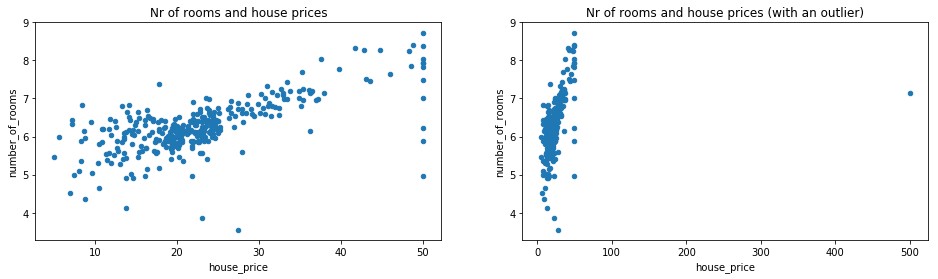

In [31]:
plot_house_prices_and_rooms()

In [32]:
def calculate_correlations_with_pandas(house_prices, number_of_rooms):
    
    pearson_corr = house_prices.corr(number_of_rooms)
    spearman_corr = house_prices.corr(number_of_rooms, method='spearman')
    
    return pearson_corr, spearman_corr

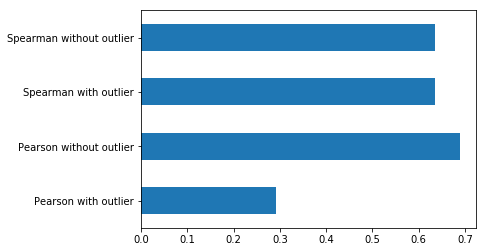

In [33]:
number_of_rooms, house_prices_normal, house_prices_with_outliers = get_house_prices_and_rooms()

pearson_corr_normal, spearman_corr_normal = calculate_correlations_with_pandas(house_prices_normal, 
                                                                               number_of_rooms)
pearson_corr_outlier, spearman_corr_outlier = calculate_correlations_with_pandas(house_prices_with_outliers, 
                                                                                 number_of_rooms)

# quick plot to see what happens
results = pd.Series({
    'Pearson without outlier': pearson_corr_normal,
    'Pearson with outlier': pearson_corr_outlier,
    'Spearman without outlier': spearman_corr_normal,
    'Spearman with outlier': spearman_corr_outlier,
})

results.plot(kind='barh')
plt.show()

Expected output 

    Pearson without outlier     0.689598
    Pearson with outlier        0.291450
    Spearman without outlier    0.635173
    Spearman with outlier       0.635284

In [34]:
assert np.isclose((pearson_corr_normal - pearson_corr_outlier), 0.398, atol=.01)
assert np.isclose((spearman_corr_normal - spearman_corr_outlier), 0, atol=.01)

# Exercise 5: Forest fires 

You will now use your new learned skills to examine a dataset about Forest Fires in the North of Portugal.

Using whatever tools you wish, and complete the following analysis. 

Regarding the dataset, the columns are the following: 
    1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
    2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
    3. month - month of the year: "jan" to "dec" 
    4. day - day of the week: "mon" to "sun"
    5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
    6. DMC - DMC index from the FWI system: 1.1 to 291.3 
    7. DC - DC index from the FWI system: 7.9 to 860.6 
    8. ISI - ISI index from the FWI system: 0.0 to 56.10
    9. temp - temperature in Celsius degrees: 2.2 to 33.30
    10. RH - relative humidity in %: 15.0 to 100
    11. wind - wind speed in km/h: 0.40 to 9.40 
    12. rain - outside rain in mm/m2 : 0.0 to 6.4 
    13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   
_Example taken from [P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. ](http://www.dsi.uminho.pt/~pcortez/fires.pdf), the excellent academics who open sourced the data :)_

In [35]:
forest = pd.read_csv('data/forestfires.csv')

# Explore the dataset 
# Hint 1: you can use display(<name of df>) to force it to pretty print
# Hint 2: the correlation matrix and the heatmap visualization might come in handy
# Hint 3: you may want to import something to help with the visualization 
# Hint 4: you can either paste the number, or use a purely programmatic solution. 
# Hint 5: when we say lowest and highest we mean the sign, not the "magnitude"

In [38]:
forest.sample(15)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
420,8,8,8,2,91.7,191.4,635.9,7.8,26.2,36,4.5,0.0,185.76
478,7,4,7,6,93.7,101.3,423.4,14.7,18.2,82,4.5,0.0,2.21
235,8,6,8,6,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48
335,4,3,9,0,91.6,108.4,764.0,6.2,9.8,86,1.8,0.0,0.00
383,9,6,8,3,91.6,248.4,753.8,6.3,20.5,58,2.7,0.0,42.87
324,6,5,9,3,88.1,53.3,726.9,5.4,13.7,56,1.8,0.0,4.42
251,8,5,8,2,93.1,157.3,666.7,13.5,24.0,36,3.1,0.0,0.24
144,2,5,8,2,95.5,99.9,513.3,13.2,23.8,32,5.4,0.0,0.77
328,6,5,9,5,92.2,102.3,751.5,8.4,19.7,35,1.8,0.0,0.00
179,8,6,8,1,88.8,147.3,614.5,9.0,14.4,66,5.4,0.0,5.23


In [60]:
import seaborn as sns

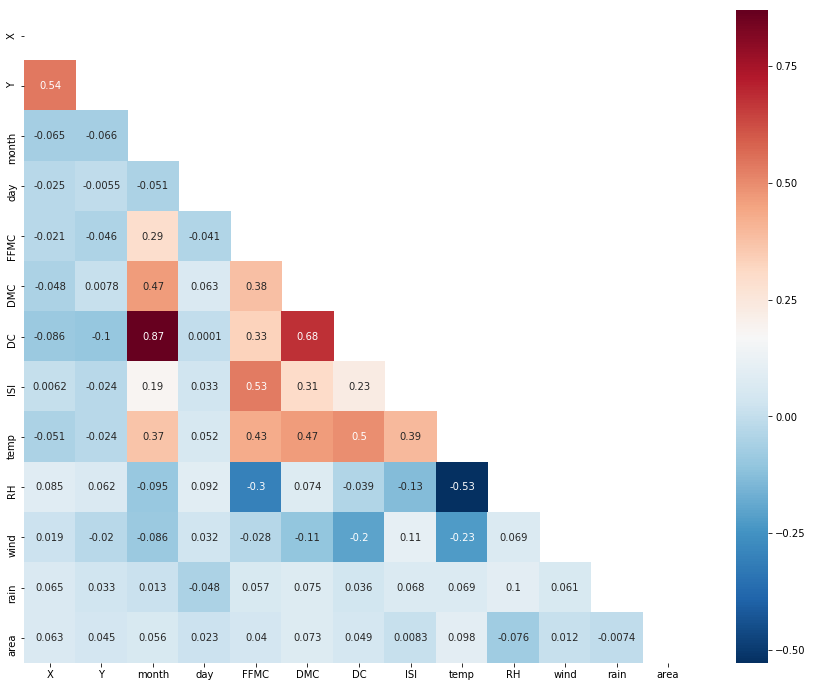

In [66]:
forest_corr = forest.corr()
triangular_m = np.triu(np.ones(forest_corr.shape), k=0).astype(bool)

plt.figure(figsize = (15,12))

sns.heatmap(
    forest_corr.mask(triangular_m), 
    cmap='RdBu_r',
    annot=True
)

In [69]:
# Complete the following questions 

# # Q1: What the the feature with the lowest pearson correlation with burned area?
lowest_pearson_correlation_with_area = forest_corr.idxmin().loc['area']

In [81]:
# # # Q2: What the the feature with the highest spearman correlation with burned area?
forest_scorr = forest_corr.corr(method='spearman')
forest_scorri = forest_scorr.mask(np.identity(forest_corr.shape[0]).astype(bool))

highest_spearman_corr_with_area = forest_scorri.idxmax().loc['area']

In [84]:
# # Q3: what is the pearson correlation between the area of fires, and the month of the year?
pearson_corr_area_month = forest_corr.loc['area', 'month']

In [88]:
# # Q4: can you think of a confounding variable that might suggest that the month does not actually cause fires?
possible_confounding_variable = 'temp'

Expected output 

    No expected output on this one, see if it passes the test output ;) 

#### Test output (don't change code here) 

In [90]:
a = '5ba37872b8da4055745d4a9ab7d9c472471e8a8a5555f00c68d4e304b642605e'
b = 'a5c7d1719e284f2c9485405d44f62d152cde9e6ede83e1a79a2442b65f6a8735'
c = 'a6864eb339b0e1f6e00d75293a8840abf069a2c0fe82e6e53af6ac099793c1d5'
d = '319b44c570a417ff3444896cd4aa77f052b6781773fc2f9aa1f1180ac745005c'


assert hash_answer(lowest_pearson_correlation_with_area) == a
assert hash_answer(highest_spearman_corr_with_area) == b
assert np.isclose(pearson_corr_area_month, 0.0564, atol=0.01)
assert hash_answer(possible_confounding_variable) in [a, c, d]
